# Neuroscience, Learning, Memory, Cognition Course
## Sharif University of Technology


In [14]:
#@title Enter your information & "RUN the cell!!"
student_id =  99105753 #@param {type:"integer"}
student_name = "Mohammad Mowlavi" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 99105753
your name: Mohammad Mowlavi


##Exercise Outline :
This exercise consist of two parts: in the first part, we would practice our python skills and also learn some basic analyzing tools. In the second part, we would get familiar with some neuron models which you may have seen before in the course. You have to complete and deliver the .ipynb file and a report describing your result. Grades will be given based on your report and your code.


## Importing Libraries

First we import libraries that we need for this assignment.

In [15]:
##################################
# add all necessary packages here
##################################
import numpy as np
import math
import matplotlib.pyplot as plt


#** PART I**

*Fourier* trnasform


One important technique to characterize rhythms in data is the Fourier transform. This powerful tool, allows us to observe the frequency spectrum of the data. Search about fft and describe it in your report.

*`10 Points`*

Now let's see how it works in action. Produce a sinusoidal wave with $f = 10Hz$. Then add another sinusoidal wave with $f = 20Hz$. Use numpy's or scipy's fft functions to show the frequency spectrum.

*`10 Points`*

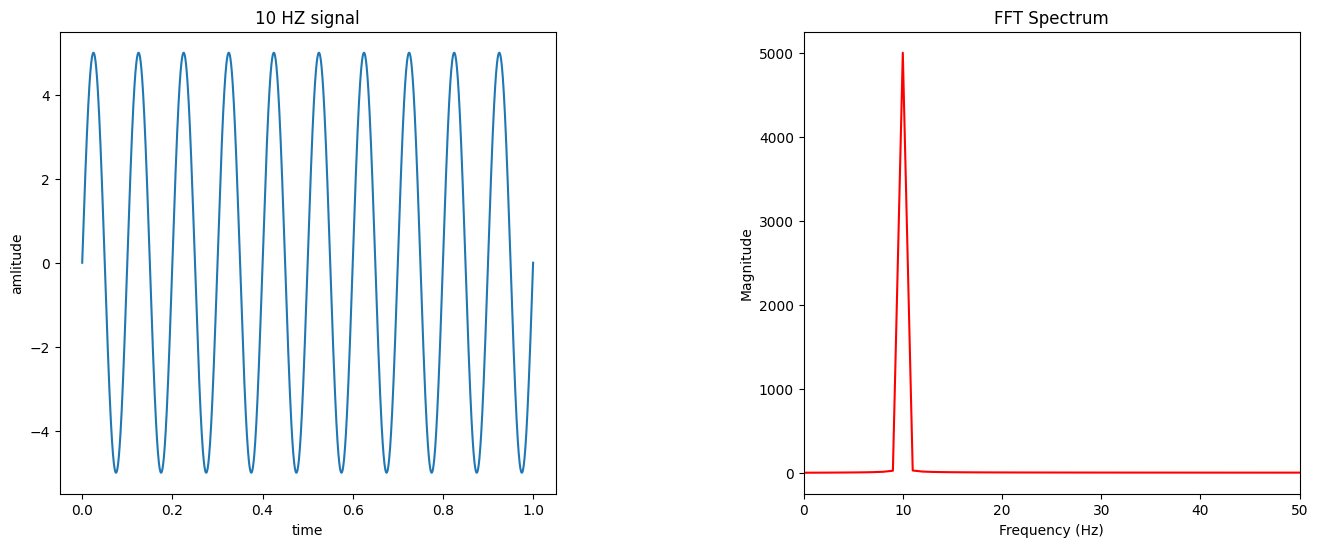

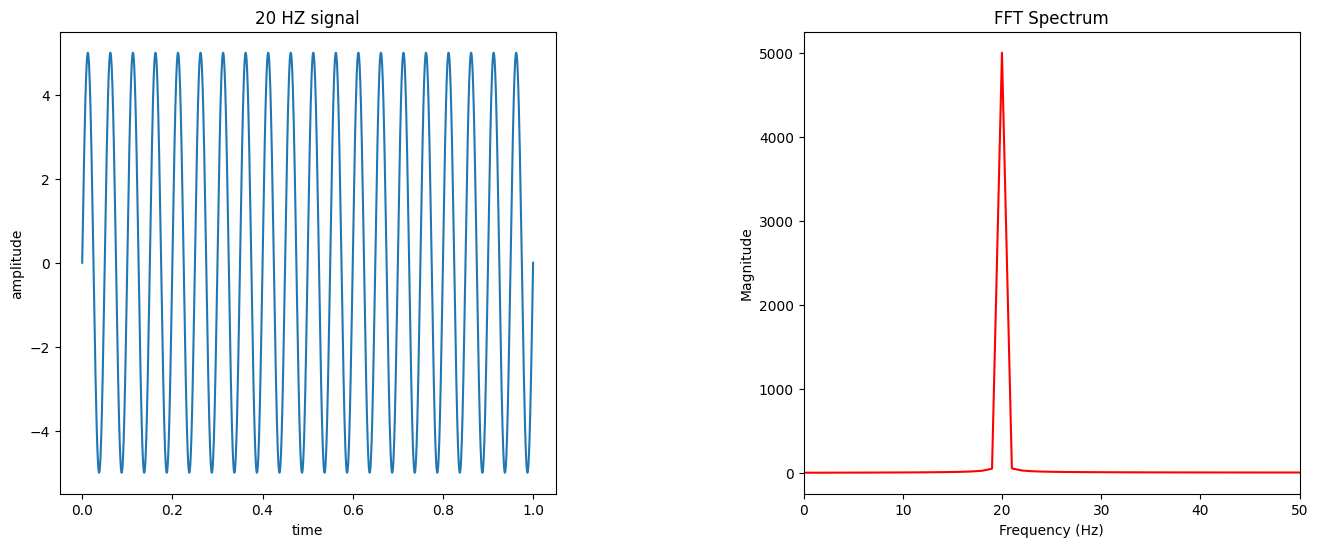

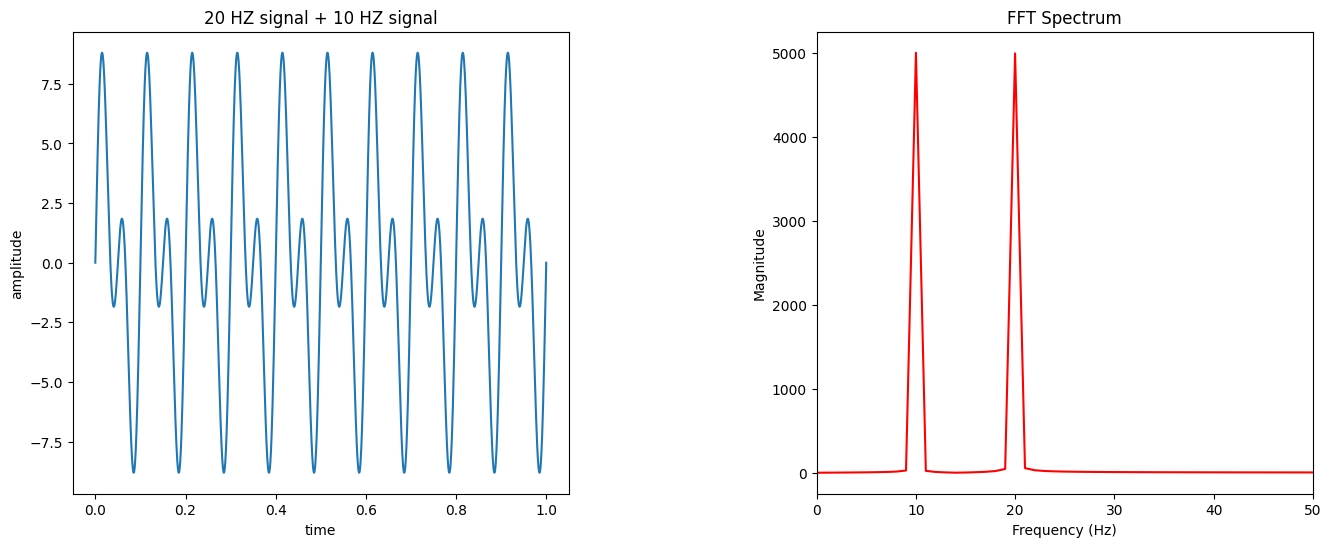

In [16]:
### START CODE HERE ###
time = np.linspace(0, 1, 2000)

def show_plot(x_axis, y_axis, x_label, y_label, title, x_axis_2, y_axis_2, x_label_2, y_label_2, title_2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    ax1.plot(x_axis, y_axis)
    ax1.set_title(title)
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)

    ax2.plot(x_axis_2, y_axis_2, 'r')
    ax2.set_title(title_2)
    ax2.set_xlabel(x_label_2)
    ax2.set_ylabel(y_label_2)
    ax2.set_xlim(0, 50)

    plt.subplots_adjust(wspace=0.5)

    plt.show()

def get_ferquncy_and_fft(signal, time):
    fft = np.fft.fft(signal)
    sampling_rate = 1 / (time[1] - time[0])
    N = len(fft)
    n = np.arange(N)
    T = N / sampling_rate
    freq = n/T
    return freq, fft


ferquency_1 = 10
signal_1 = 5 * np.sin(time * 2 * math.pi * ferquency_1)
freq, fft = get_ferquncy_and_fft(signal_1, time)
show_plot(time, signal_1, "time", "amlitude", "10 HZ signal", freq, np.abs(fft), "Frequency (Hz)", "Magnitude", "FFT Spectrum")


ferquency_2 = 20
signal_2 = 5 * np.sin(time * 2 * math.pi * ferquency_2)
freq, fft = get_ferquncy_and_fft(signal_2, time)
show_plot(time, signal_2, "time", "amplitude", "20 HZ signal", freq, np.abs(fft), "Frequency (Hz)", "Magnitude", "FFT Spectrum")

signal_3 = signal_1 + signal_2
freq, fft = get_ferquncy_and_fft(signal_3, time)
show_plot(time, signal_3, "time", "amplitude", "20 HZ signal + 10 HZ signal", freq, np.abs(fft), "Frequency (Hz)", "Magnitude", "FFT Spectrum")



### END CODE HERE ###

Search about Gaussian white noise and describe it in your report.

*`10 points`*

Now corrupt the data with this noise and show the frequency spectrum.

*`10 points`*

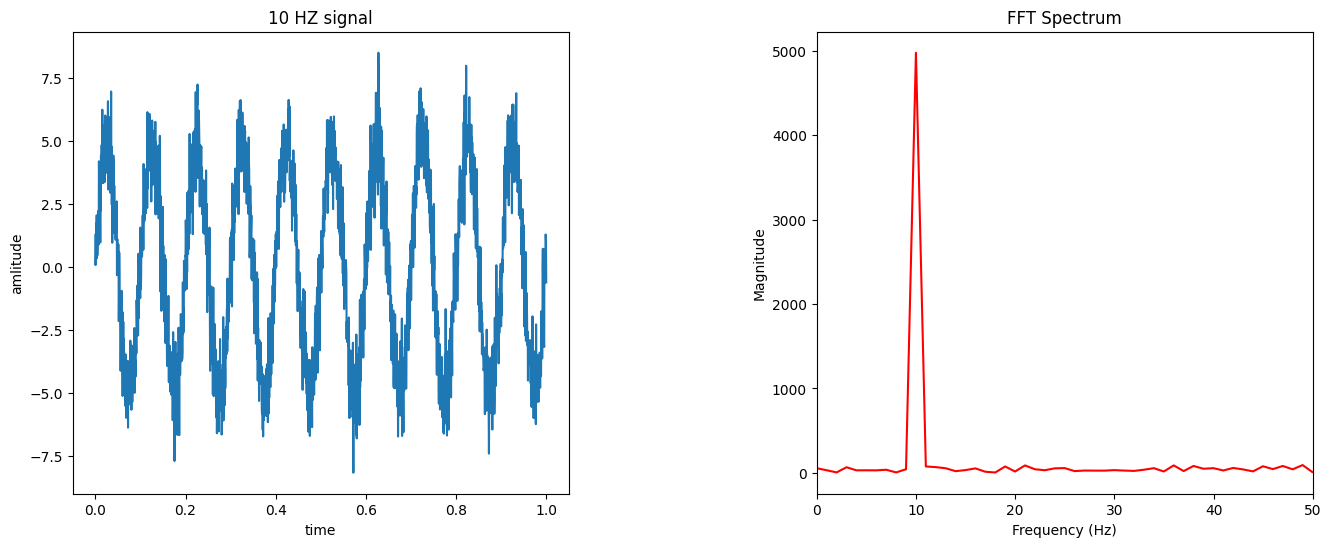

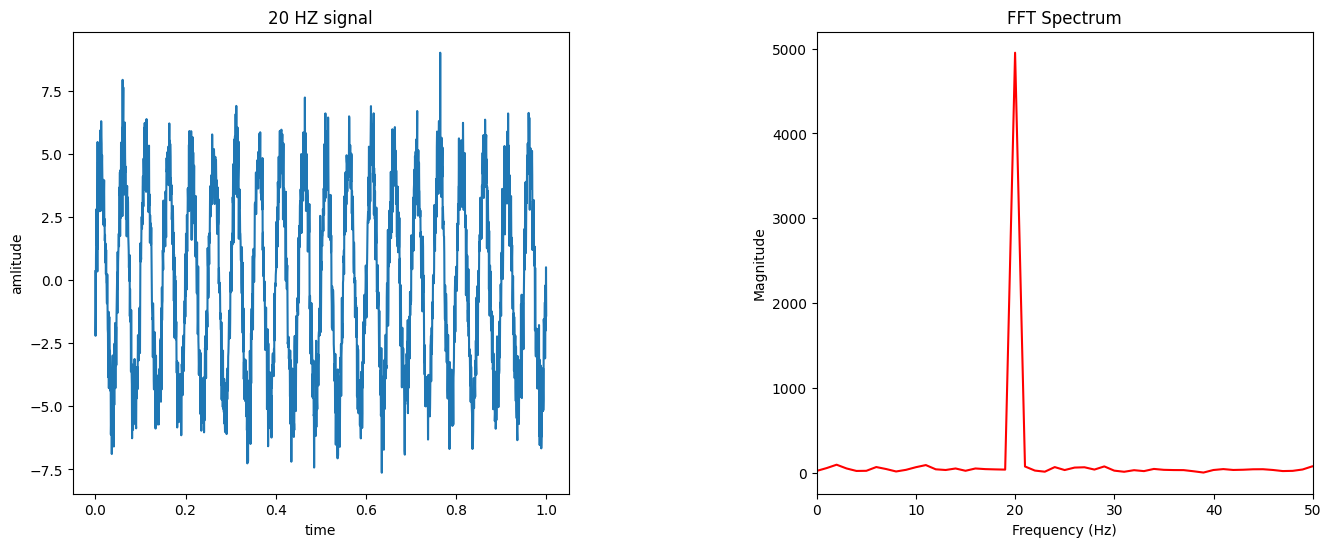

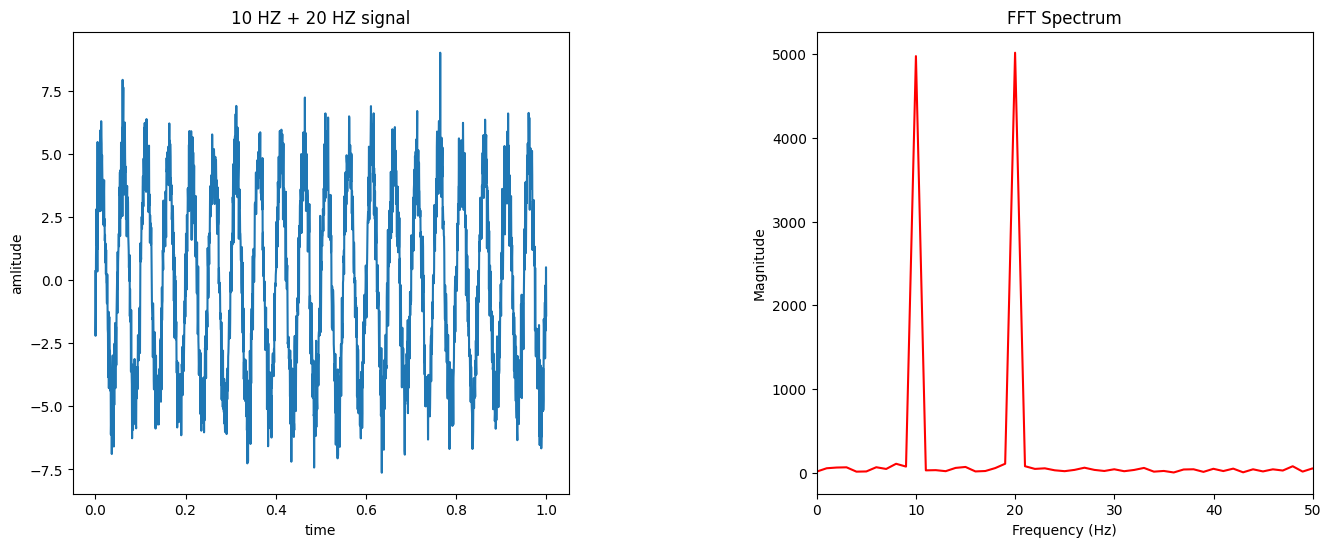

In [17]:
### START CODE HERE ###
corrupted_signal_1 = np.random.normal(0, 1, len(signal_1)) + signal_1
freq, fft = get_ferquncy_and_fft(corrupted_signal_1, time)
show_plot(time, corrupted_signal_1, "time", "amlitude", "10 HZ signal", freq, np.abs(fft), "Frequency (Hz)", "Magnitude", "FFT Spectrum")

corrupted_signal_2 = np.random.normal(0, 1, len(signal_2)) + signal_2
freq, fft = get_ferquncy_and_fft(corrupted_signal_2, time)
show_plot(time, corrupted_signal_2, "time", "amlitude", "20 HZ signal", freq, np.abs(fft), "Frequency (Hz)", "Magnitude", "FFT Spectrum")

corrupted_signal_3 = np.random.normal(0, 1, len(signal_3)) + signal_3
freq, fft = get_ferquncy_and_fft(corrupted_signal_3, time)
show_plot(time, corrupted_signal_2, "time", "amlitude", "10 HZ + 20 HZ signal", freq, np.abs(fft), "Frequency (Hz)", "Magnitude", "FFT Spectrum")
### END CODE HERE ###

##Bonus:

Search about cross spectrum and describe it in your report. Then calculate and plot the cross power spectral density between the given signals. Describe the reuslts in your report. What does $np.random.seed$ do?



*`15 points`*

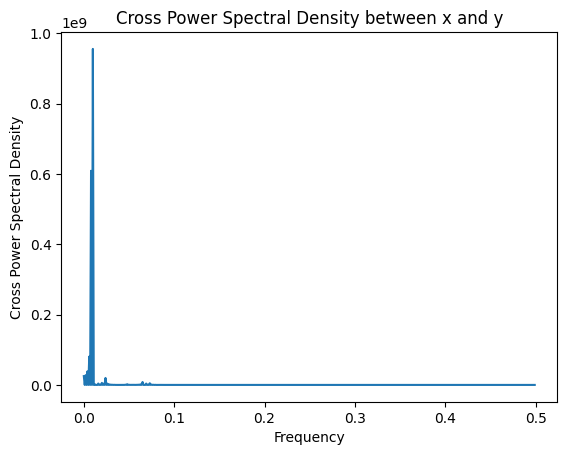

In [18]:
np.random.seed(seed=73)
firstSigFreqs = np.random.randint(1, 100, 5)
secondSigFreqs = np.random.randint(1, 100, 5)
time = np.arange(0, 1, .001)

x = np.zeros(1000)
y = np.zeros(1000)

for freq in (firstSigFreqs):
  x += np.sin(2*np.pi*time*freq)

for freq in (secondSigFreqs):
  y += np.sin(2*np.pi*time*freq)


### START CODE HERE ###
cross_spectrum = np.fft.fft(np.correlate(x, y, mode='same'))
cross_power_spectral_density = np.abs(cross_spectrum) ** 2

x_axis = np.fft.fftfreq(len(cross_power_spectral_density))
plt.plot(x_axis[:len(x_axis)//2], cross_power_spectral_density[:len(x_axis)//2])
plt.xlabel('Frequency')
plt.ylabel('Cross Power Spectral Density')
plt.title('Cross Power Spectral Density between x and y')
plt.show()
### END CODE HERE ###

#** PART II**

#The Leaky Integrate-and-Fire (LIF) model

Now, let's implement one of the simplest mathematical model of a neuron: the leaky integrate-and-fire (LIF) model. The basic idea of LIF neuron was proposed in 1907 by Louis Édouard Lapicque, long before we understood the electrophysiology of a neuron.

The subthreshold membrane potential dynamics of a LIF neuron is described by

\begin{eqnarray}
C_m\frac{dV}{dt} = -g_L(V-E_L) + I,\quad (1)
\end{eqnarray}

Dividing both sides of the above equation by $g_L$ gives

\begin{align}
\tau_m\frac{dV}{dt} = -(V-E_L) + \frac{I}{g_L}\,,\quad (2)
\end{align}


What are the parameters of the the equation? Describe them in your report. What are the results of altering them numerically?


*`10 points`*

Now let's implement this model. For this purpose, we have to solve this equation numerically. Search about Euler's method and describe it in your report.

*`10 points`*

A dictionary is given to initialize the parameters of the simulation. Simulate this model using Euler's method. Inject different values of external current and describe the resutls. Don't forget to add a horizontal line to indicate the threshold level.

In [19]:
pars = {}
pars['V_th'] = -55.
pars['V_reset'] = -75.
pars['tau_m'] = 10.
pars['g_L'] = 10.
pars['V_init'] = -75.
pars['E_L'] = -75.
pars['tref'] = 2. # refractory time (ms)


pars['T'] = 500.  # Total duration of simulation [ms]
pars['dt'] = .1   # Simulation time step [ms]



pars['range_t'] = np.arange(0, pars['T'], pars['dt'])  # Vector of discretized time points [ms]

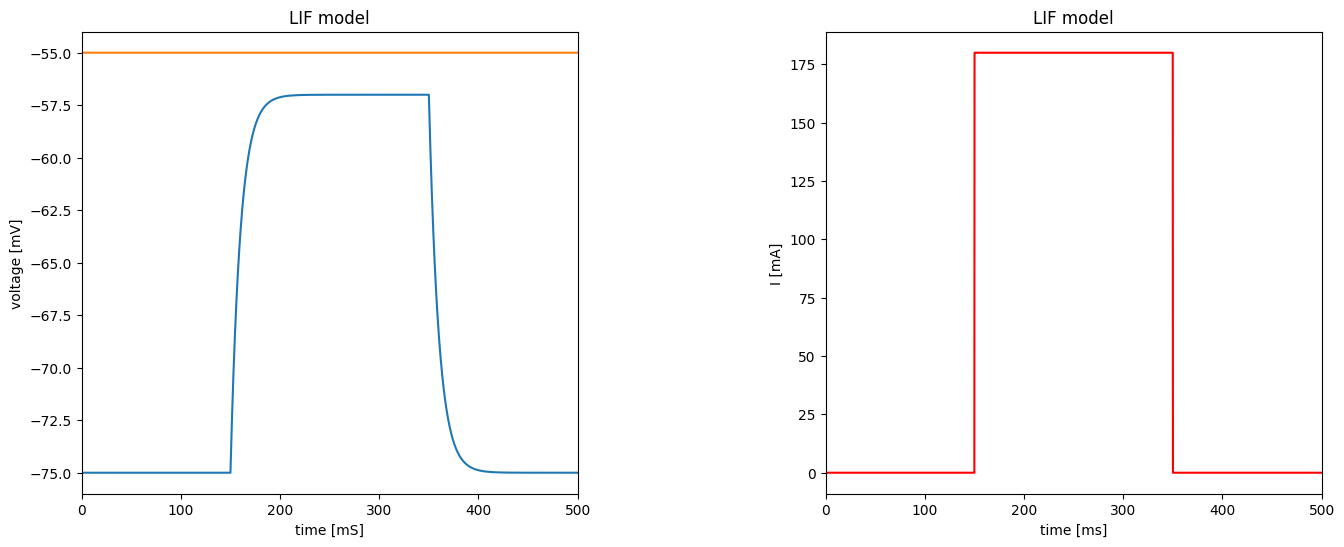

In [20]:
### START CODE HERE ###
def simulate_LIF(pars, Iext=180):
  # Initialize variables
  V = np.zeros(len(pars['range_t']))
  V[0] = pars['V_init']
  Iext = Iext * np.ones(len(V))
  Iext[:int(len(Iext) / 2) - 1000] = 0
  Iext[int(len(Iext) / 2) + 1000:] = 0
  refactory_prioid = 0

  # runing itrative euler method for finding V
  for iteratation in range(len(V) - 1):
    if refactory_prioid > 0:
      V[iteratation] = pars['V_reset']  # set voltage to reset
      refactory_prioid = refactory_prioid - 1
    elif V[iteratation] >= pars['V_th']:
      V[iteratation] = pars['V_reset']  # reset voltage
      refactory_prioid = pars['tref'] / pars['dt']  # set refractory time

    # Increment potential
    dvdt = 1 / pars['tau_m'] * (pars['E_L'] - V[iteratation] + Iext[iteratation] / pars['g_L']) * pars['dt']

    # Update
    V[iteratation + 1] = V[iteratation] + dvdt

  return V, Iext

def show_plots(x_axis, y_axis, x_label, y_label, title, x_axis_2, y_axis_2, x_label_2, y_label_2, title_2, x_lim, V_th):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    ax1.plot(x_axis, y_axis)
    ax1.set_title(title)
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)
    ax1.set_xlim(x_lim)
    ax1.plot(x_axis, pars['V_th'] * np.ones(len(x_axis)))     # plotting the threshold voltage

    ax2.plot(x_axis_2, y_axis_2, 'r')
    ax2.set_title(title_2)
    ax2.set_xlabel(x_label_2)
    ax2.set_ylabel(y_label_2)
    ax2.set_xlim(x_lim)

    plt.subplots_adjust(wspace=0.5)

    plt.show()
    return ax1, ax2

# Simulate LIF model
V, Iext = simulate_LIF(pars)
# Visualize
ax1, ax2 = show_plots(pars['range_t'], V, 'time [mS]', 'voltage [mV]', 'LIF model', pars['range_t'], Iext, 'time [ms]', 'I [mA]', 'LIF model', (0, pars['T']), pars['V_th'])


### END CODE HERE ###

##Bonus:

Create a gif!
Each frame contains a solved and plotted simulation. Alter the injected current in each frame and you will see an incredible result!


*`15 points`*

In [21]:
### START CODE HERE ###

# There is a gif next to the other files with simulation's name
import imageio

def create_gif(pars, Iext_values):
    images = []
    for Iext_value in Iext_values:
        Iext = Iext_value * np.ones(len(pars['range_t']))
        V, _ = simulate_LIF(pars, Iext)
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.plot(pars['range_t'], V)
        ax.set_title(f'LIF model (Iext = {Iext_value})')
        ax.set_xlabel('Time [ms]')
        ax.set_ylabel('Voltage [mV]')
        ax.set_xlim(0, pars['T'])
        ax.axhline(pars['V_th'], color='r', linestyle='--')
        plt.tight_layout()
        plt.savefig('temp.png')
        images.append(imageio.imread('temp.png'))
        plt.close()

    imageio.mimsave('simulation.gif', images, duration=0.5)

# Range of injected current values
Iext_values = [i + 1 for i in range(10)]

create_gif(pars, Iext_values)
### END CODE HERE ###

<ipython-input-21-ec1bce37593a>:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('temp.png'))


#The Hodgkin-Huxley model

The Hodgkin–Huxley model, or conductance-based model, is a mathematical model that describes how action potentials in neurons are initiated and propagated. It is a set of nonlinear differential equations that approximates the electrical characteristics of excitable cells such as neurons and muscle cells. It is a continuous-time dynamical system.

4 equations of Hodgkin-Huxley model  
* $C_M\displaystyle \frac{dV}{dt}=-g_{Na}(V-V_{Na})-g_k(V-V_K)-g_l(V-V_l)+I$ ($V$: Membrane Potential)  
* $\displaystyle \frac{dh}{dt}=\alpha_h{(V)}(1-h)-\beta_h(V)h$ ($h$: Na Inactivation)  
* $\displaystyle \frac{dm}{dt}=\alpha_m{(V)}(1-m)-\beta_m(V)m$ ($m$: Na Activation)  
* $\displaystyle \frac{dn}{dt}=\alpha_n{(V)}(1-n)-\beta_n(V)n$ ($n$: K Activation)  

Describe the parameters in your report.

*`10 points`*

Now let's implement this model. Some of the functions are given. Use Euler's method or any other method to solve this equaiton for the given parametrs. Choose the injected current wisely.

*`15 points`*

In [22]:
def alphaM(V):
    return (2.5 - 0.1 * ( V + 65)) / (np.exp(2.5 - 0.1 * (V + 65)) -1)

def betaM(V):
    return 4 * np.exp(-(V + 65) / 18)

def alphaH(V):
    return 0.07 * np.exp(-(V + 65) / 20)

def betaH(V):
    return 1 / (np.exp(3.0 - 0.1 * (V + 65)) + 1)

def alphaN(V):
    return (0.1 - 0.01 * (V + 65)) / (np.exp(1 - 0.1 * (V + 65)) - 1)

def betaN(V):
    return 0.125 * np.exp(-(V + 65) / 80)

dt = 0.01;
T0 = 100
T  = math.ceil(T0 / dt)  # [ms]


t = np.arange(0, T) * dt

gNa0 = 120   # [mS/cm^2]
ENa  = 115;  # [mV]
gK0  = 36;   # [mS/cm^2]
EK   = -12;  # [mV]
gL0  = 0.3;  # [mS/cm^2]
EL   = 10.6; # [mV]


In [23]:
### START CODE HERE ###
I0 = 0 # low input current
t = np.arange(0, T) * dt
V = np.zeros([T, 1])
m = np.zeros([T, 1])
h = np.zeros([T, 1])
n = np.zeros([T, 1])

V[0] = -75.0 # mV
m[0] = 0.1 # near to real prob
h[0] = 0.5 # near to real prob
n[0] = 0.3 # near to real prob

for i in range(0,T-1):

    V[i + 1] = V[i] + dt * (-1 * gNa0 * m[i] ** 3 * h[i] * (V[i] + 65 - ENa) - gK0 * n[i] **4 * (V[i] + 65 - EK) - gL0 * (V[i] + 65 - EL) + I0)
    m[i + 1] = m[i] + dt * (alphaM(V[i]) * (1 - m[i]) - betaM(V[i]) * m[i])
    h[i + 1] = h[i] + dt * (alphaH(V[i]) * (1 - h[i]) - betaH(V[i]) * h[i])
    n[i + 1] = n[i] + dt * (alphaN(V[i]) * (1 - n[i]) - betaN(V[i]) * n[i])

### END CODE HERE ###

Now plot all 4 solved equations! What are the dynamics of these equations? Describe it in your report.

*`20 points`*

Text(0, 0.5, 'K Activation probability')

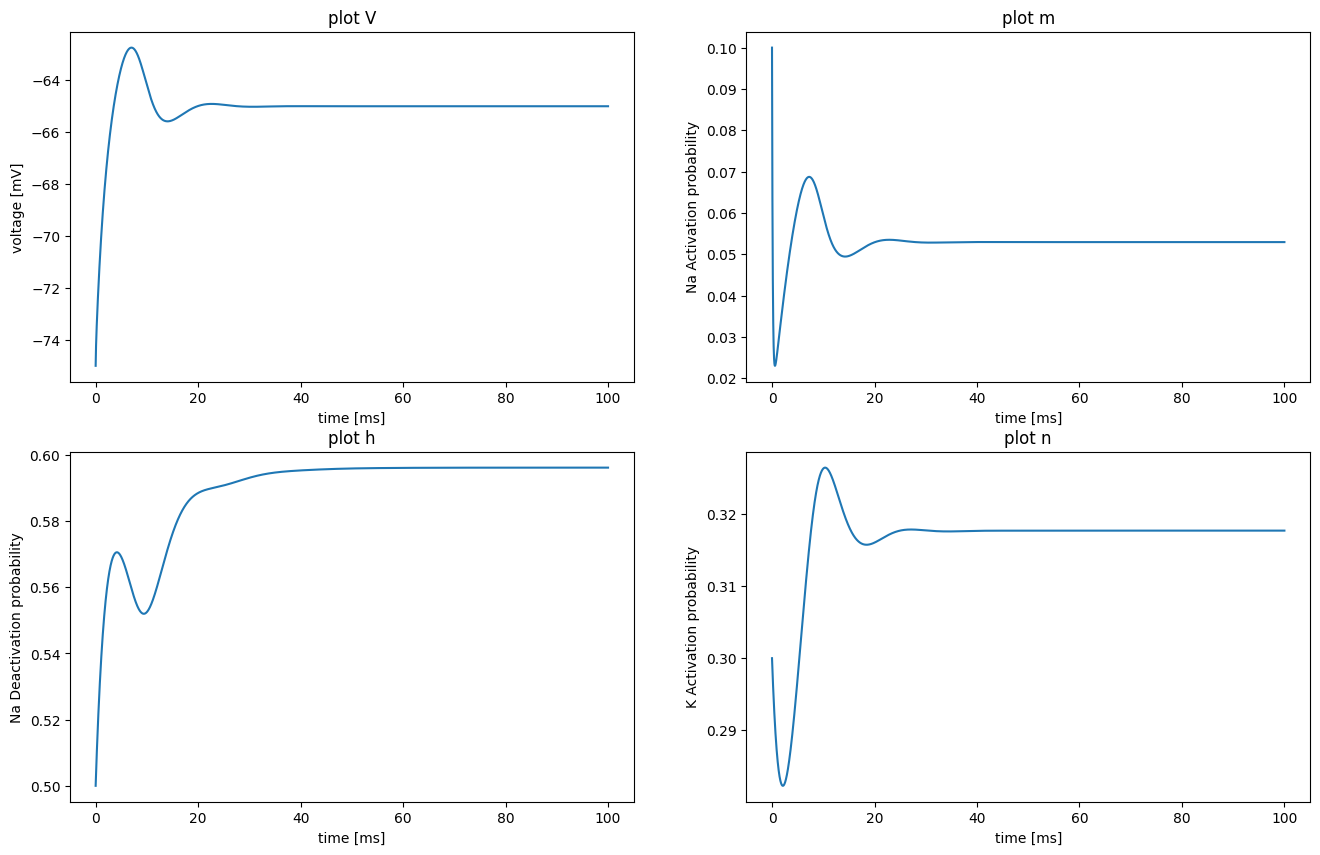

In [24]:
### START CODE HERE ###
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

ax1.plot(t, V)
ax1.set_title('plot V')
ax1.set_xlabel('time [ms]')
ax1.set_ylabel('voltage [mV]')

ax2.plot(t, m)
ax2.set_title('plot m')
ax2.set_xlabel('time [ms]')
ax2.set_ylabel('Na Activation probability')

ax3.plot(t, h)
ax3.set_title('plot h')
ax3.set_xlabel('time [ms]')
ax3.set_ylabel('Na Deactivation probability')

ax4.plot(t, n)
ax4.set_title('plot n')
ax4.set_xlabel('time [ms]')
ax4.set_ylabel('K Activation probability')
### END CODE HERE ###